In [44]:
import pandas as pd
import matplotlib

In [45]:
file = "CASECENTEREDCITATION.csv"
df = pd.read_csv(file,encoding="cp1252")
print(df.head())

     caseId     docketId    caseIssuesId             voteId dateDecision  \
0  1946-001  1946-001-01  1946-001-01-01  1946-001-01-01-01   11/18/1946   
1  1946-002  1946-002-01  1946-002-01-01  1946-002-01-01-01   11/18/1946   
2  1946-003  1946-003-01  1946-003-01-01  1946-003-01-01-01   11/18/1946   
3  1946-004  1946-004-01  1946-004-01-01  1946-004-01-01-01   11/25/1946   
4  1946-005  1946-005-01  1946-005-01-01  1946-005-01-01-01   11/25/1946   

   decisionType       usCite        sctCite       ledCite  \
0             1   329 U.S. 1    67 S. Ct. 6   91 L. Ed. 3   
1             1  329 U.S. 14   67 S. Ct. 13  91 L. Ed. 12   
2             1  329 U.S. 29    67 S. Ct. 1  91 L. Ed. 22   
3             7  329 U.S. 40  67 S. Ct. 167  91 L. Ed. 29   
4             1  329 U.S. 64  67 S. Ct. 154  91 L. Ed. 44   

              lexisCite  ...  authorityDecision1  authorityDecision2 lawType  \
0  1946 U.S. LEXIS 1724  ...                 4.0                 NaN     6.0   
1  1946 U.S. LEX

In [46]:
print(list(df))

['caseId', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision', 'decisionType', 'usCite', 'sctCite', 'ledCite', 'lexisCite', 'term', 'naturalCourt', 'chief', 'docket', 'caseName', 'dateArgument', 'dateRearg', 'petitioner', 'petitionerState', 'respondent', 'respondentState', 'jurisdiction', 'adminAction', 'adminActionState', 'threeJudgeFdc', 'caseOrigin', 'caseOriginState', 'caseSource', 'caseSourceState', 'lcDisagreement', 'certReason', 'lcDisposition', 'lcDispositionDirection', 'declarationUncon', 'caseDisposition', 'caseDispositionUnusual', 'partyWinning', 'precedentAlteration', 'voteUnclear', 'issue', 'issueArea', 'decisionDirection', 'decisionDirectionDissent', 'authorityDecision1', 'authorityDecision2', 'lawType', 'lawSupp', 'lawMinor', 'majOpinWriter', 'majOpinAssigner', 'splitVote', 'majVotes', 'minVotes']


     Justice  Number of Cases
0     Burger             2809
2  Rehnquist             2044
3    Roberts             1225
4     Vinson              812
1     Warren             2205


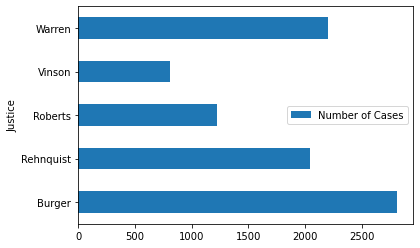

In [47]:
col = 'chief' #<-edit this value! column name as it appears in dataframe
col_name = 'Justice' #<-edit this value! descriptive name for column
freq = df[col].value_counts().rename_axis(col_name).reset_index(name='Number of Cases')
freq = freq.sort_values(by = col_name)
print(freq)

ax = freq.plot.barh(x=col_name, y='Number of Cases', rot=0)

           precedentAlteration
chief                         
Burger                0.020648
Rehnquist             0.022026
Roberts               0.020408
Vinson                0.016010
Warren                0.022222
           partyWinning
chief                  
Burger         0.659309
Rehnquist      0.598826
Roberts        0.687347
Vinson         0.537014
Warren         0.671960


<AxesSubplot:title={'center':'Mean party winning by justice'}, xlabel='Justice', ylabel='Mean party winning'>

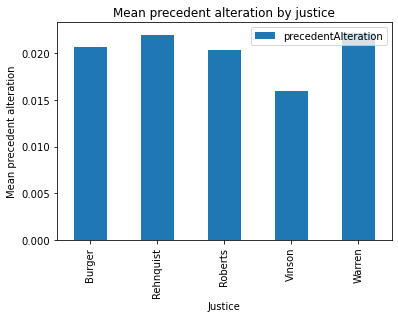

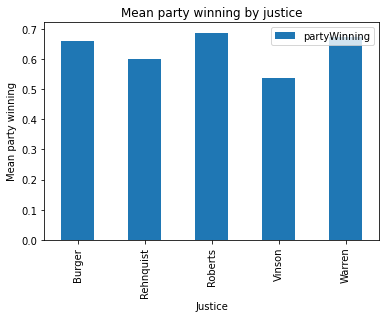

In [48]:
justice_mean_PA = df.groupby("chief")[["precedentAlteration"]].mean()
print(justice_mean_PA)

justice_mean_partyWin = df.groupby("chief")[["partyWinning"]].mean()
print(justice_mean_partyWin)

justice_mean_PA.plot(kind = "bar", title = "Mean precedent alteration by justice", ylabel = "Mean precedent alteration", xlabel = "Justice")
justice_mean_partyWin.plot(kind = "bar", title = "Mean party winning by justice", ylabel = "Mean party winning", xlabel = "Justice")

In [49]:
df_2000_plus = df[df["term"] > 2000] 
df_2020_minus = df_2000_plus[df_2000_plus["term"] < 2021]

<AxesSubplot:title={'center':'Mean Party Winning by Year 2000-2020'}, xlabel='Year', ylabel='Mean Party Winning'>

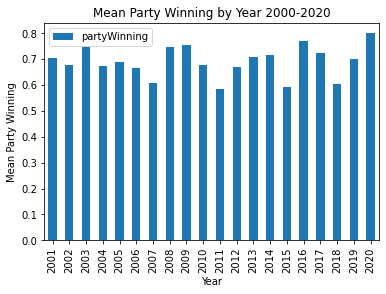

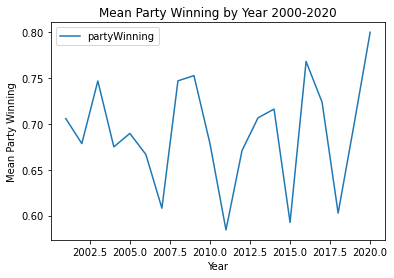

In [50]:
partyWinning_mean = df_2020_minus.groupby("term")[["partyWinning"]].mean()

partyWinning_mean.plot(kind = "bar", title = "Mean Party Winning by Year 2000-2020", ylabel = "Mean Party Winning", xlabel = "Year") 

partyWinning_mean.plot(kind = "line", title = "Mean Party Winning by Year 2000-2020", ylabel = "Mean Party Winning", xlabel = "Year") 

<AxesSubplot:title={'center':'Mean Precedent Alteration from 2000-2020'}, xlabel='Year', ylabel='Mean Predecent Alteration'>

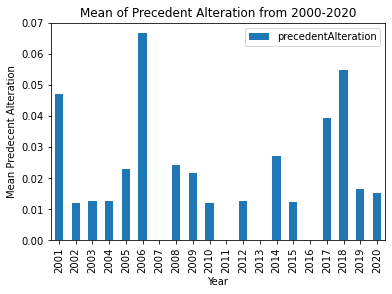

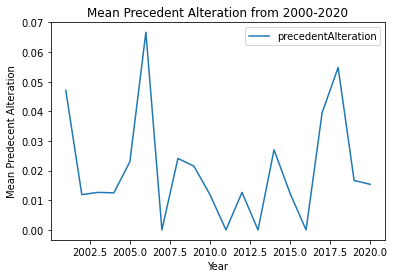

In [51]:
precedentAlteration_mean = df_2020_minus.groupby("term")[["precedentAlteration"]].mean()

precedentAlteration_mean.plot(kind = "bar", title = "Mean of Precedent Alteration from 2000-2020", ylabel = "Mean Predecent Alteration", xlabel = "Year")

precedentAlteration_mean.plot(kind = "line", title = "Mean Precedent Alteration from 2000-2020", ylabel = "Mean Predecent Alteration", xlabel = "Year")

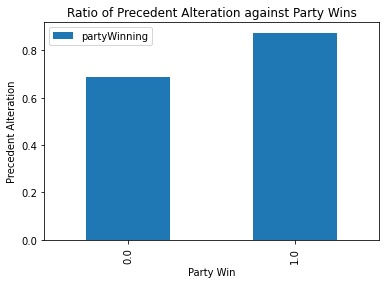

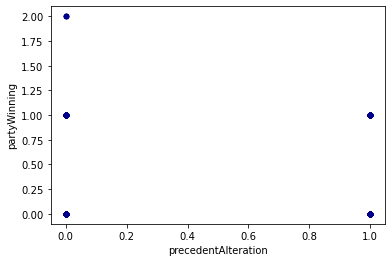

In [52]:
total_mean = df_2020_minus.groupby("precedentAlteration")[["partyWinning"]].mean()
#print(total_mean)

total_mean.plot(kind = "bar", title = "Ratio of Precedent Alteration against Party Wins", ylabel = "Precedent Alteration", xlabel = "Party Win")

ax1 = df.plot.scatter(x='precedentAlteration', y='partyWinning', c='DarkBlue')


In [53]:
PartyWinningAverage = df_2020_minus[["partyWinning"]].mean()
print(PartyWinningAverage)

partyWinning    0.690277
dtype: float64


In [54]:
precedentAlterationAverage = df_2020_minus[["precedentAlteration"]].mean()
print(precedentAlterationAverage)

precedentAlteration    0.020605
dtype: float64
